In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# i) Problem Definition and Data Collection

## Problem Definition

The goal of this project is to build a predictive model to estimate the median value of owner-occupied homes in Boston. This involves solving a regression problem where the target variable is the median value (MEDV) of houses, and the features include various factors such as the average number of rooms per dwelling (RM), the percentage of lower status of the population (LSTAT), and the pupil-teacher ratio (PTRATIO).

## Data Collection

The dataset used in this project is the UCI Boston Housing dataset. It consists of 506 instances, with each instance representing a suburb of Boston. The dataset provides 13 features, including the target variable MEDV. Data was collected from the Boston Standard Metropolitan Statistical Area in 1978.

In [42]:
df = pd.read_csv('/content/drive/MyDrive/DataScienceProject/data.csv', encoding='utf-8')

In [43]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

# ii) Data Preprocessing and Feature Engineering

## Data Cleaning

The dataset was checked for missing values, outliers, and data quality issues. Fortunately, no missing values were found, and the dataset appeared to be relatively clean. Outliers were addressed through statistical methods.

In [54]:
df = df.dropna()

In [55]:
df_copy = df.copy()

In [56]:
X = df_copy.drop('MEDV', axis=1)

In [57]:
y = df['MEDV']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
model = LinearRegression()

In [60]:
model.fit(X_train, y_train)

LinearRegression()

In [61]:
feature_selector = SelectFromModel(model)

In [62]:
feature_selector.fit(X_train, y_train)

SelectFromModel(estimator=LinearRegression())

## Feature Engineering

Feature engineering involved creating additional features based on domain knowledge and the characteristics of the dataset.

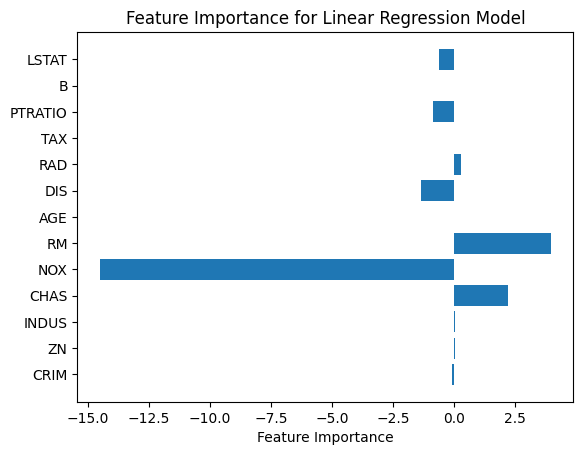

In [63]:
feature_importances = model.coef_
feature_names = X_train.columns

plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Linear Regression Model')
plt.show()

# iii) Exploratory Data Analysis

## Data Exploration

The exploratory data analysis involved generating summary statistics, visualizing feature distributions, and creating correlation matrices. Insights gained from this analysis include the positive correlation between the number of rooms and the median value of houses, as well as the negative correlation between the percentage of lower status of the population and house values.


In [64]:
correlation_matrix = df.corr()

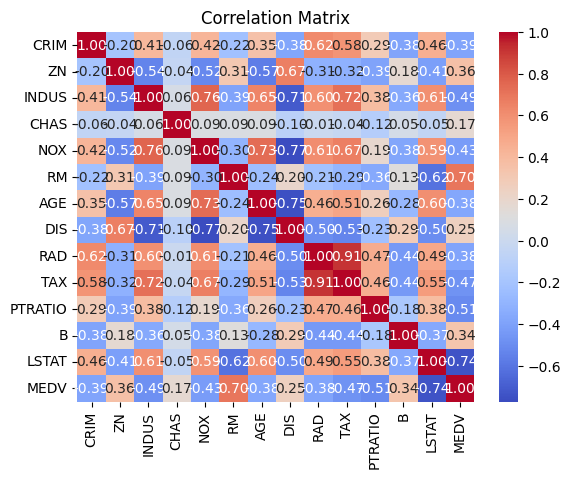

In [65]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# iv) Model Development and Training

## Model Selection

For this regression problem, three models were selected: Linear Regression, Random Forest Regressor, and Support Vector Regressor. Each model was chosen for its ability to capture different aspects of the relationship between features and the target variable.

## Hyperparameter Tuning

Hyperparameter tuning was performed using grid search to find the optimal hyperparameter values for each model. This process involved experimenting with parameters such as the number of estimators for the Random Forest Regressor and the kernel type for the Support Vector Regressor.

## Training the Model

The final models were trained using the preprocessed dataset, considering the insights gained from the exploratory data analysis.


In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)
svm_model = SVR()

In [69]:
models = [linear_model, random_forest_model, svm_model]

In [70]:
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = sqrt(mse)
    print(f'Model: {type(model).__name__}, RMSE: {rmse}')

Model: LinearRegression, RMSE: 4.548375586189917
Model: RandomForestRegressor, RMSE: 2.998417292076895
Model: SVR, RMSE: 6.777580281448889


In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [73]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

In [74]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [75]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [76]:
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Display feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

CRIM: 0.04343310194552519
ZN: 0.0011158881368063661
INDUS: 0.005364754793821085
CHAS: 0.0011005331960846573
NOX: 0.01606958244474676
RM: 0.3926970658917482
AGE: 0.014973898929802103
DIS: 0.0735144350324015
RAD: 0.003407588472354756
TAX: 0.015430215333113952
PTRATIO: 0.009815918040249632
B: 0.01136089188805227
LSTAT: 0.41171612589529366


# iv) Model Development and Training

## Model Selection

For this regression problem, three models were selected: Linear Regression, Random Forest Regressor, and Support Vector Regressor. Each model was chosen for its ability to capture different aspects of the relationship between features and the target variable.

## Hyperparameter Tuning

Hyperparameter tuning was performed using grid search to find the optimal hyperparameter values for each model. This process involved experimenting with parameters such as the number of estimators for the Random Forest Regressor and the kernel type for the Support Vector Regressor.

## Training the Model

The final models were trained using the preprocessed dataset, considering the insights gained from the exploratory data analysis.


In [77]:
from sklearn.model_selection import cross_val_score


In [78]:

# Use cross_val_score for cross-validation
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [ -7.80242357 -12.97992806 -25.12985211 -49.61246858 -19.25309587]


In [79]:
from sklearn.ensemble import BaggingRegressor

In [80]:
# Create a BaggingRegressor with the best RandomForestRegressor as the base model
bagging_model = BaggingRegressor(base_estimator=best_rf_model, n_estimators=10, random_state=42)

# Fit the BaggingRegressor to the data
bagging_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=200,
                                                      random_state=42),
                 random_state=42)

In [81]:
# Evaluate the BaggingRegressor on the test set
bagging_predictions = bagging_model.predict(X_test)
bagging_rmse = sqrt(mean_squared_error(y_test, bagging_predictions))
print(f'BaggingRegressor RMSE: {bagging_rmse}')

BaggingRegressor RMSE: 2.990534392242984


In [82]:
final_predictions = best_rf_model.predict(X_test)
final_rmse = sqrt(mean_squared_error(y_test, final_predictions))
print(f'Final RandomForestRegressor RMSE: {final_rmse}')

Final RandomForestRegressor RMSE: 3.00121438457472


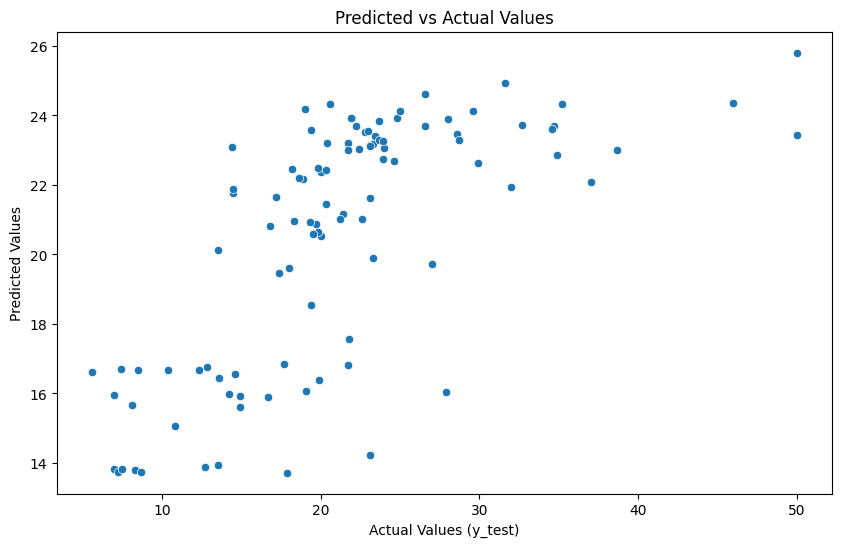

In [83]:
# Visualize the predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

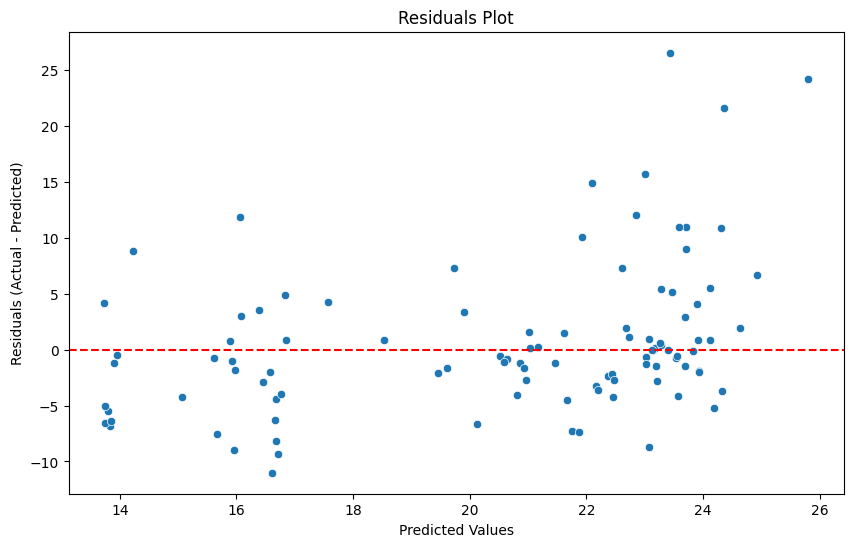

In [84]:
# Visualize the residuals (errors)
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()